# Tochi Okeke
## Classification Analysis of Bank Customers


# Project Summary:
This dataset contains infomration on the telemarketing campaigns of a Portuguese bank. The goal of the campiagn was to convert a contact into a subscirber for a bank term deposit. 

The goal of this project is to predict whether or not a contact will subscribe using the data provided. 

This is a binary classification problem.

# The Data:

Data is obtained from the UCI Machine Learning Repository

Citation:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

## Datasets:
### train: 
This contains all 411,888 examples and 20 variables ordered by date from May 2008 to November 2010
### test: 
This has 4119 randomly selected observations from the train dataset
## Variables:

#### Categorical:
* job
* marital 
* education 
* default
* housing
* loan
* day_of_week
* duration
* campaign
* pdays: number of days since last contact
* previous: number of contacts performed before
* poutcome: outcome of last campaign

#### Numeric Variables:
* age (numeric)
* emp.var.rate: employment variation rate 
* cons.price.idx: consumer price index 
* cons.conf.idx: consumer confidence index 
* euribor3m: euribor 3 month rate
* nr.employed: number of employees
* contact: number of contacts performed
 
### Output variable (desired target):
* y - has the client subscribed a term deposit? (binary: 'yes','no')


In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
#Loading libraries
import pandas as pd
import numpy as np

from scipy import stats
from scipy import stats, special
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
%pylab inline
%matplotlib inline

import seaborn as sns
import matplotlib.gridspec as gridspec

Populating the interactive namespace from numpy and matplotlib


In [3]:
# The data comes pre-split into train and test sets.
# I will leave the given test set to evaluate the final model
# The train set will be split into 4 parts for cross validation

In [4]:
#Loading the datasets

In [5]:
train = pd.read_csv('bankadditionalfull.csv', sep=';')
test = pd.read_csv('bankadditional.csv', sep=';')

In [6]:
# Taking a quick look at the datasets

In [7]:
train.head(5)
test.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [8]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## Exploratory Analysis and Data Cleaning

###### I am going to explore the relationships and clean the dataset for modelling

In [9]:
train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [10]:
print(train.shape)
print(test.shape)

(41188, 21)
(4119, 21)


###### We can also see that there are a few missing entries. let's drop those entries

In [11]:
train.replace('unknown',np.NaN, inplace=True)
train.dropna(inplace=True)
test.replace('unknown',np.NaN, inplace=True)
test.dropna(inplace=True)
train.replace('admin.','admin',inplace=True)
test.replace('admin.','admin',inplace=True)
train.replace('nr.employed','nremployed',inplace=True)
test.replace('nr.employed','nremployed',inplace=True)

###### Finally the education column can be more descriptive. 
###### I will transform the levels from their descriptive names to years of schooling as follows:
* 4 Basic.4y to 4, 
* Basic.6y to 6, 
* Basic.9y to 9, 
* high.school to 12, 
* illiterate to 0, 
* professional.course to 14, 
* university.degree to 16, 
* unknown will be dropped.
###### There are quite a few assumptions made in those transformations. For example, a professional course is not necessarily 14 years but the trade off is out-weighed by the ability to conduct analysis with a numeric column.

In [12]:
train.replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'),(4,6,9,12,0,14,16), inplace=True)
test.replace(('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree'),(4,6,9,12,0,14,16), inplace=True)

###### Time to drop the duration column

In [13]:
train.drop(columns=['duration'], inplace=True)
test.drop(columns=['duration'], inplace=True)

In [14]:
train.replace(('yes','no'),(1,0), inplace = True)
test.replace(('yes','no'),(1,0),inplace = True)

###### The data looks good for now, let's start with a correlation matrix to see what variables will be useful in the analysis

In [15]:
#I use the get_dummies function on the success colum 'y' to see how the other variables are correlated with a success or failure

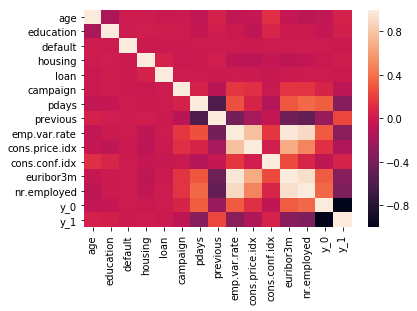

In [16]:
sns.heatmap((pd.get_dummies(data=train,columns=['y'])).corr())

In [17]:
#Expectedly, there is a high correlation between the variables related to interest rates
#This multicollinearity will be addressed in the regression model, by choosing only one of the group
#The categorical variables (age, education, default, housing and loan) although highly correlated, are not as interesting as the economic factors or success of a previous campaign

   # Data Visualization

In [18]:
#Distribution of Yes/No Answers

In [19]:
count_class_0, count_class_1 = train.y.value_counts()
count_class_2, count_class_3 = test.y.value_counts()

In [20]:
print(train.y.value_counts())

0    26629
1     3859
Name: y, dtype: int64


In [21]:
print(test.y.value_counts())

0    2720
1     370
Name: y, dtype: int64


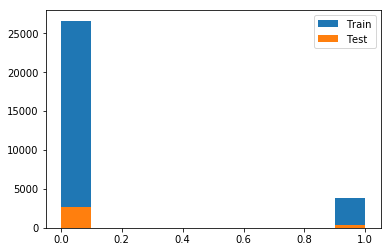

In [22]:
hist(x=train['y'],label= 'Train');
hist(x=test['y'], label = 'Test');
plt.legend()

#### Under sampling

In [23]:
#I will under-sample the no category to get an accurate description of the dataset

In [24]:
train_0 = train[train['y']==0].sample(count_class_1)
train_1 = train[train['y']==1]
test_0 = test[test['y']==0].sample(count_class_3)
test_1 = test[test['y']==1]

In [25]:
train_under = pd.concat([train_0,train_1], axis=0)
test_under = pd.concat([test_0,test_1], axis=0)

In [26]:
#Distribution of Job Type

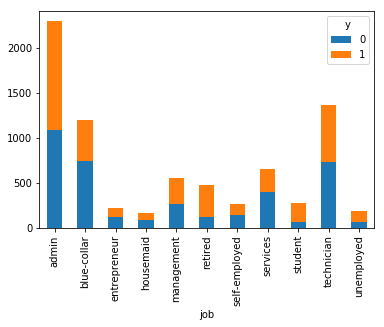

In [27]:
df1 = pd.DataFrame(train_under.groupby((['job','y']))['job'].count().unstack('y'))
df1.plot(kind='bar',stacked=True)

###### Admin workers, students, retirees and technicians have the highest number of successful campaigns.

In [28]:
#Age distribution

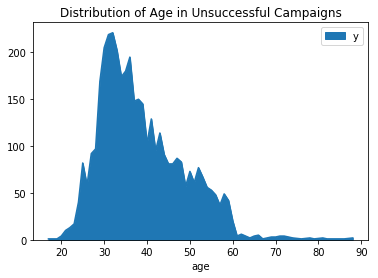

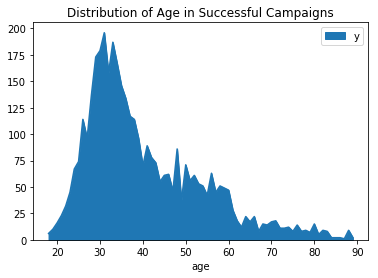

In [29]:
train1=train.sample(frac=.15)
df1 = pd.DataFrame(train1[train1.y==0].groupby((['age'])).y.count())
df1.plot(kind='area',title="Distribution of Age in Unsuccessful Campaigns",label='y=0')
df2 = pd.DataFrame(train[train.y==1].groupby((['age'])).y.count())
df2.plot(kind='area',title="Distribution of Age in Successful Campaigns", label='y=1')
plt.legend()

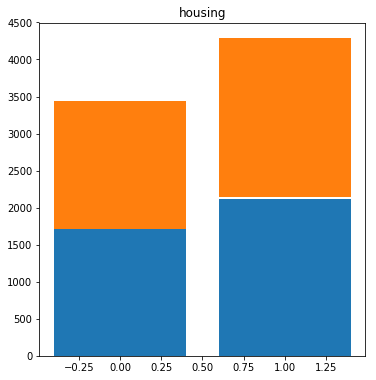

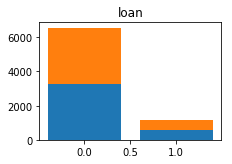

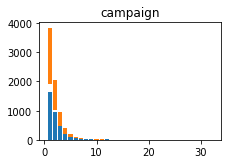

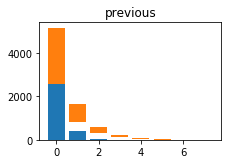

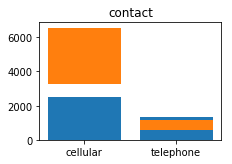

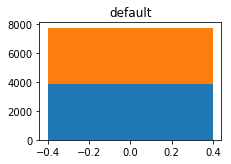

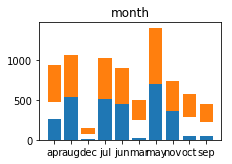

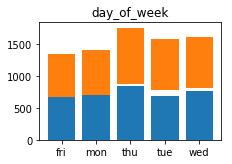

In [95]:
    fig = plt.figure(figsize=(10,10))
    gridspec.GridSpec(2,2)
    positions = [(0,0),(0,1),(1,0),(1,1),(0,0),(0,1),(1,0),(1,1)]
    groups = ['housing','loan','campaign','previous','contact','default','month','day_of_week']
    d = dict(zip(groups,positions))
    for i in groups:
            df = train_under[train_under.y==0].groupby(i).count()
            df1 = train_under[train_under.y==1].groupby(i).count()
            plt.subplot2grid((2,2),(d[i]),rowspan=1, colspan=1)
            plt.bar(df.index,df['y'])
            plt.bar(df1.index,df1['y'], bottom = df1['y'])
            plt.tight_layout()
            plt.title(i)
            plt.show()

30-40 year olds make up a large portion of the dataset
#However, there is a larger number of participants aged 60+ in the successful campaigns
#Housing loan
#No loan
#Less time on the campaign
#cellular
#may, aug, jul, jun
#thursday

The distribution of education levels is similar amongst both groups, however for successful

# Data Modelling and Validation

 First, let's look at a multiple logistic regression and decision trees. I will test a few logisitic regression models and then compare them to a decision tree.

In [35]:
traind = pd.get_dummies(train) # convert categorical variables to dummies
testd = pd.get_dummies(test)

In [36]:
kf = model_selection.KFold(n_splits=4,shuffle=True)

In [37]:
set1,set2,set3,set4 = kf.split(traind)

In [38]:
traind.columns

Index(['age', 'education', 'default', 'housing', 'loan', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'contact_cellular', 'contact_telephone', 'month_apr',
       'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success'],
      dtype='object')

In [103]:
dftrain1 = traind.iloc[set1[0],:]
dftest1 = traind.iloc[set1[1],:]
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = dftrain1[dftrain1.columns.difference(['y'])]
Y = dftrain1['y']
lgrg.fit(X,Y)

C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:462: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:313: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\tochi\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
          verbose=0, warm_start=False)

In [ ]:
a = pd.DataFrame(dftest1)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict1 = pd.DataFrame(lgrg.predict((b)))
true1 = pd.DataFrame(Y1) 

In [ ]:
score = lgrg.score(b,true1)
score

It might help to include interaction terms in the regression. I will model that on the second set

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
dftrain2 = traind.iloc[set2[0],:]
dftest2 = traind.iloc[set2[1],:]
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = dftrain2[dftrain2.columns.difference(['y'])]
poly = PolynomialFeatures(include_bias=False)
poly.fit_transform(X)
Y = dftrain2['y']
lgrg.fit(X,Y)

In [ ]:
a = pd.DataFrame(dftest2)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict2 = pd.DataFrame(lgrg.predict((b)))
true2= pd.DataFrame(Y1) 

In [ ]:
score = lgrg.score(b,true2)
score

In [ ]:
#The accuracy rate has dropped

In [ ]:
cm = confusion_matrix(true2,predict2)
print(cm)
print(classification_report(true2,predict2))

For the third set, I will use a decision tree

In [ ]:
dftrain3 = traind.iloc[set3[0],:]
dftest3 = traind.iloc[set3[1],:]
X = dftrain3[dftrain1.columns.difference(['y'])]
Y = dftrain3['y']

In [ ]:
classifier = DecisionTreeClassifier()
classifier.fit(X,Y)

In [ ]:
a = pd.DataFrame(dftest3)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict3 = pd.DataFrame(classifier.predict((b)))
true3= pd.DataFrame(Y1) 

In [ ]:
score = classifier.score(b,true3)
score

In [ ]:
cm = confusion_matrix(true3,predict3)
print(cm)
print(classification_report(true3,predict3))

In [ ]:
dftrain4 = traind.iloc[set4[0],:]
dftest4 = traind.iloc[set4[1],:]
X = dftrain4[dftrain1.columns.difference(['y'])]
Y = dftrain4['y']

Here I try to deal with the unbalanced dataset using class_weight in the classifier

In [ ]:
classifier = DecisionTreeClassifier(class_weight='balanced')
classifier.fit(X,Y)

In [ ]:
a = pd.DataFrame(dftest4)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predict4 = pd.DataFrame(classifier.predict((b)))
true4= pd.DataFrame(Y1) 

In [ ]:
score = classifier.score(b,true4)
score

In [ ]:
cm = confusion_matrix(true4,predict4)
print(cm)
print(classification_report(true4,predict4))

This has a slightly higher accuracy but does not do as well as the first logistic regression

The first logistic regression had the highest score, so I will use that model on the final test data.

In [ ]:
lgrg = linear_model.LogisticRegression(solver='newton-cg')
X = testd[testd.columns.difference(['y'])]
Y = testd['y']
lgrg.fit(X,Y)

In [ ]:
a = pd.DataFrame(testd)
b = a[a.columns.difference(['y'])]
Y1 = a['y'].values.reshape(-1,1)
predictions = pd.DataFrame(lgrg.predict((b)))
true_values = pd.DataFrame(Y1) 

In [ ]:
score = lgrg.score(b,true_values)
score

In [ ]:
cm = confusion_matrix(true1,predict1)
print(cm)
print(classification_report(true_values,predictions))